# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Clayton Seabaugh
### GitHub Repo: https://github.com/ClaytonSeabaughGH/web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [1]:
# Imports
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt


### Question 1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [5]:
url='https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/'

response = requests.get(url)
if response.status_code == 200:
    html_content = response.text

 # Save the HTML content to a .pkl file
    with open("article.pkl", "wb") as file:
        pickle.dump(html_content, file)
    
    print("HTML content saved to 'article.pkl'.")
else:
    print(f"Failed to fetch the article. HTTP Status Code: {response.status_code}")

print(response.status_code)
print(response.headers['content-type'])

HTML content saved to 'article.pkl'.
200
text/html; charset=UTF-8


### Question 2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [3]:
import pickle
from bs4 import BeautifulSoup
# Load the HTML content from the .pkl file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract and print the text content
print(soup.get_text())

















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

### Question 3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [6]:
import pickle
from bs4 import BeautifulSoup
from collections import Counter
import spacy

# Load the article's HTML content from the .pkl file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text()

# Load a trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the article text through the spaCy pipeline
doc = nlp(article_text)

# Filter out tokens we don't care about (punctuation, stopwords, whitespace)
filtered_tokens = [
    token.text.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the frequency of tokens
token_counts = Counter(filtered_tokens)

# Get the 5 most common tokens
most_common_tokens = token_counts.most_common(5)

# Print the results with labels
print("Most Common Tokens:")
for token, freq in most_common_tokens:
    print(f"Token: {token}, Frequency: {freq}")

Most Common Tokens:
Token: comment, Frequency: 136
Token: march, Frequency: 133
Token: 2021, Frequency: 133
Token: says, Frequency: 132
Token: report, Frequency: 130


### Question 4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [7]:

# Load the article's HTML content from the .pkl file
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text()

# Load a trained spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Process the article text through the spaCy pipeline
doc = nlp(article_text)

# Filter out tokens we don't care about (punctuation, stopwords, whitespace)
filtered_lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the frequency of lemmas
lemma_counts = Counter(filtered_lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Print the results with labels
print("Most Common Lemmas:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")


Most Common Lemmas:
Lemma: comment, Frequency: 157
Lemma: say, Frequency: 134
Lemma: march, Frequency: 133
Lemma: 2021, Frequency: 133
Lemma: report, Frequency: 130


### Question 5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [8]:
# Define functions
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Scores a sentence by the number of interesting tokens appearing
    divided by the total number of words in the sentence.
    """
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    # Filter out stopwords and punctuation
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]
    # Count matches with interesting tokens
    token_matches = sum(1 for token in tokens if token in interesting_tokens)
    # Return score
    return token_matches / len(tokens) if tokens else 0


def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Scores a sentence by the number of interesting lemmas appearing
    divided by the total number of words in the sentence.
    """
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(sentence)
    # Filter out stopwords and punctuation
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    # Count matches with interesting lemmas
    lemma_matches = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    # Return score
    return lemma_matches / len(lemmas) if lemmas else 0

# Test Functions with the first sentence from the article
with open("article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse and process the text to extract the first sentence
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text()
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)
first_sentence = list(doc.sents)[0].text

# Most frequent tokens and lemmas identified in Question 3 and 4
interesting_tokens = ["laser", "headlights", "light", "work", "car"]  # Example from Q3
interesting_lemmas = ["laser", "headlight", "light", "work", "car"]  # Example from Q4

# Calculate scores
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

# Print results
print(f"First Sentence: {first_sentence}")
print(f"Token-based Score: {token_score:.2f}")
print(f"Lemma-based Score: {lemma_score:.2f}")

First Sentence: 















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
Token-based Score: 0.12
Lemma-based Score: 0.08


### Question 6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

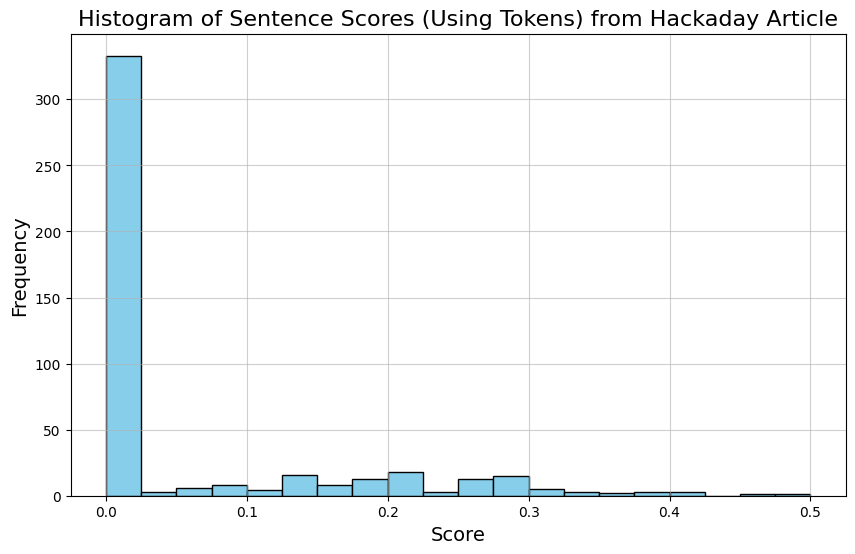

Token scores for each sentence: [0.08620689655172414, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.058823529411764705, 0.0, 0.15625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.0, 0.0, 0.2777777777777778, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.22727272727272727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18518518518518517, 0.0, 0.21739130434782608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19230769230769232, 0.0, 0.0, 0.0, 0.21739130434782608, 0.0, 0.20833333333333334, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2631578947368421, 0.0, 0.0, 0.0, 0.08928571428571429, 0.0, 0.0, 0.09615384615384616, 0.0, 0.0, 0.19230769230769232, 0.0, 0.0, 0.0, 0.0, 0.29411764705882354, 0.0, 0.0, 0.0, 0.0625, 0.15151515151515152, 0.0, 0.0, 0.5, 0.0, 0.0, 0.263157

In [14]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import spacy

# Initialize the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Assuming `loaded_html` contains the article HTML loaded previously
with open("article.pkl", "rb") as file:
    loaded_html = pickle.load(file)

# Parse the HTML content
soup = BeautifulSoup(loaded_html, "html.parser")

# Extract the text from the HTML
article_text = soup.get_text()

# Function to score a sentence by the frequency of interesting tokens
def score_sentence_by_token(sentence, interesting_tokens):
    """
    Scores a sentence by the proportion of interesting tokens it contains.
    """
    doc = nlp(sentence)  # Process the sentence with spaCy
    # Count tokens that are in the interesting token list
    token_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    # Count total meaningful words (not spaces or punctuation)
    total_words = len([token for token in doc if not token.is_space and not token.is_punct])
    return token_count / total_words if total_words > 0 else 0

# Split the article text into sentences
doc = nlp(article_text)
sentences = list(doc.sents)

# Interesting tokens (from Q3)
interesting_tokens = ["comment", "2021", "march", "says", "report"]

# Calculate scores for all sentences
token_scores = [score_sentence_by_token(sentence.text, interesting_tokens) for sentence in sentences]

# Plot a histogram of sentence scores
plt.figure(figsize=(10, 6))
plt.hist(token_scores, bins=20, edgecolor="black", color="skyblue")
plt.title("Histogram of Sentence Scores (Using Tokens) from Hackaday Article", fontsize=16)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, alpha=0.6)
plt.show()

print(f"Token scores for each sentence: {token_scores}")

# The most common range of scores seems to be from 0 to 0.025.


### Quesiton 7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

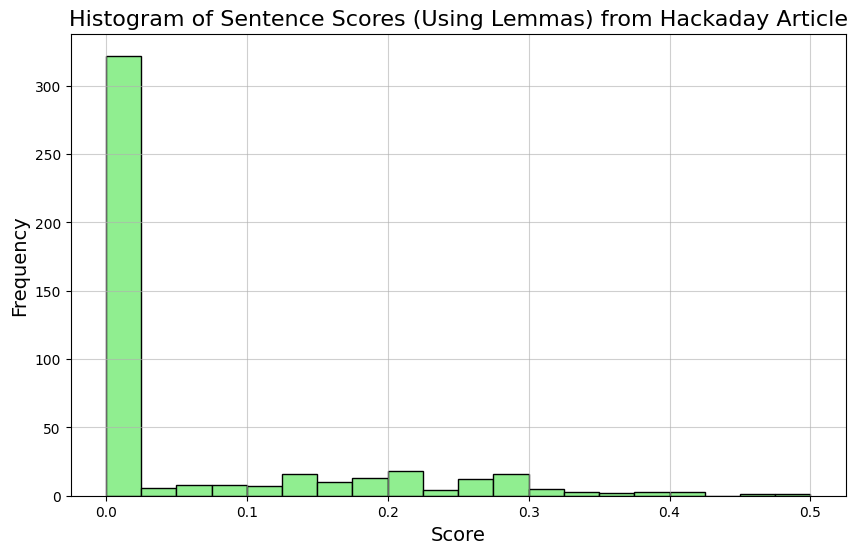

Lemma scores for each sentence: [0.10344827586206896, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.058823529411764705, 0.0, 0.15625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.0, 0.0, 0.2777777777777778, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.22727272727272727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18518518518518517, 0.0, 0.21739130434782608, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19230769230769232, 0.0, 0.0, 0.0, 0.21739130434782608, 0.0, 0.20833333333333334, 0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2631578947368421, 0.0, 0.0, 0.0, 0.08928571428571429, 0.0, 0.0, 0.09615384615384616, 0.0, 0.0, 0.19230769230769232, 0.0, 0.0, 0.0, 0.0, 0.29411764705882354, 0.0, 0.0, 0.0, 0.0625, 0.15151515151515152, 0.0, 0.0, 0.5, 0.0, 0.0, 0.263157

In [15]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import spacy
import pickle

# Initialize the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Assuming `loaded_html` contains the article HTML loaded previously
with open("article.pkl", "rb") as file:
    loaded_html = pickle.load(file)

# Parse the HTML content
soup = BeautifulSoup(loaded_html, "html.parser")

# Extract the text from the HTML
article_text = soup.get_text()

# Function to score a sentence by the frequency of interesting lemmas
def score_sentence_by_lemma(sentence, interesting_lemmas):
    """
    Scores a sentence by the proportion of interesting lemmas it contains.
    """
    doc = nlp(sentence)  # Process the sentence with spaCy
    # Count lemmas that are in the interesting lemmas list
    lemma_count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)
    # Count total meaningful words (not spaces or punctuation)
    total_words = len([token for token in doc if not token.is_space and not token.is_punct])
    return lemma_count / total_words if total_words > 0 else 0

# Split the article text into sentences
doc = nlp(article_text)
sentences = list(doc.sents)

# Interesting lemmas (from Q4)
interesting_lemmas = ["comment", "2021", "march", "say", "report"]

# Calculate scores for all sentences using lemmas
lemma_scores = [score_sentence_by_lemma(sentence.text, interesting_lemmas) for sentence in sentences]

# Plot a histogram of sentence scores (using lemmas)
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, edgecolor="black", color="lightgreen")
plt.title("Histogram of Sentence Scores (Using Lemmas) from Hackaday Article", fontsize=16)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, alpha=0.6)
plt.show()

print(f"Lemma scores for each sentence: {lemma_scores}")

# The most common range of scores seems to be from 0 to 0.025.


### Question 8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

If we only wanted to consider nouns as interesting words (either as tokens or lemmas), we would need to filter out any words that are not classified as nouns in the article. In spaCy, tokens can be classified by their part of speech (POS), and nouns are typically classified as either common nouns (NOUN) or proper nouns (PROPN).

To only consider nouns (both tokens and lemmas), you would need to modify the code to filter out non-noun words. This can be achieved by adding a condition to check whether each token is a noun or a proper noun, using token.pos_ == "NOUN" or token.pos_ == "PROPN" in the token filtering logic.

By making these adjustments, you would focus on extracting only nouns as the interesting words, which would exclude verbs, adjectives, and other non-noun words from the lists of interesting tokens and lemmas.